In [21]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt


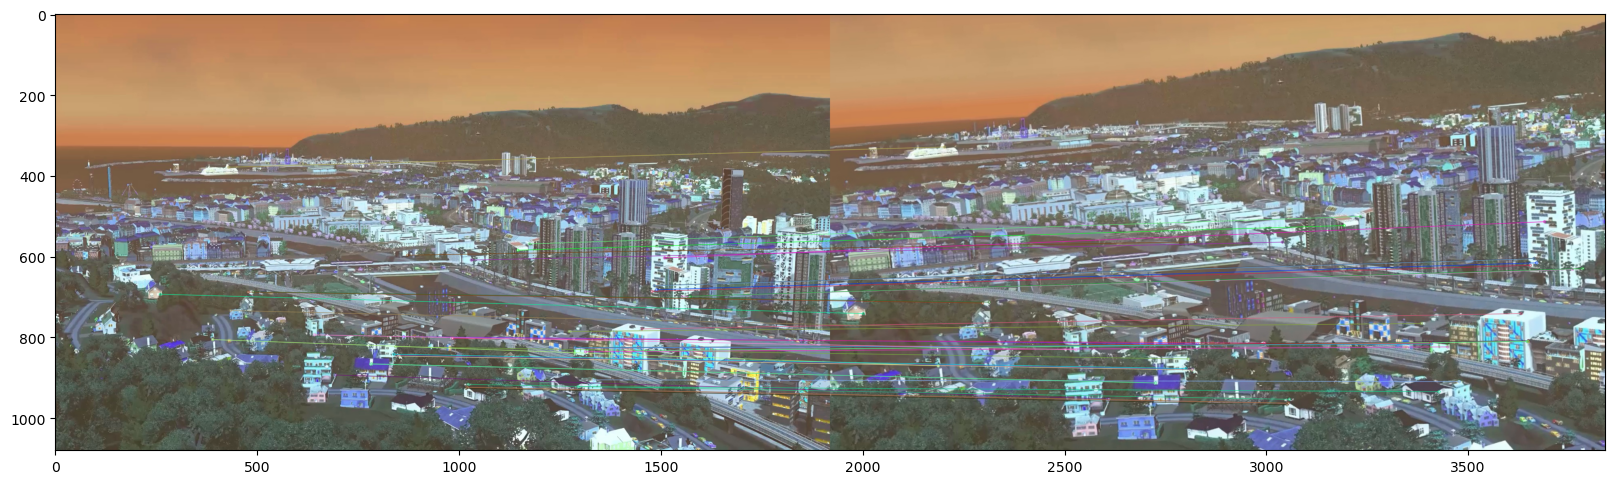

(<matplotlib.image.AxesImage at 0x7f2b3b5ddd50>, None)

In [22]:
if not os.path.exists("a_frames"):
    os.makedirs("a_frames")

original_sample = cv2.imread("frames/f_0.jpg")
frames = [f for f in os.listdir("m_frames") if not f.endswith("npy") and os.path.isfile(os.path.join("m_frames", f))]
# Convert images to grayscale
original_gray = cv2.cvtColor(original_sample, cv2.COLOR_BGR2GRAY)
f = "mf_0.jpg"
frame = cv2.imread("m_frames/" + f)
frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

# Use ORB detector to find keypoints and descriptors
orb = cv2.ORB_create()
keypoints1, descriptors1 = orb.detectAndCompute(original_gray, None)
keypoints2, descriptors2 = orb.detectAndCompute(frame_gray, None)

# Use BFMatcher to find matches
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(descriptors1, descriptors2)
matches = sorted(matches, key=lambda x: x.distance)

# Select good matches
num_good_matches = int(len(matches) * 0.2)
good_matches = matches[:num_good_matches]

# Extract location of good matches
src_pts = np.float32([keypoints1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
dst_pts = np.float32([keypoints2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

# Compute homography matrix
H, mask = cv2.findHomography(dst_pts, src_pts, cv2.RANSAC, 5.0)

# Warp the image to align with original
height, width = original_sample.shape[:2]
aligned_frame = cv2.warpPerspective(frame, H, (width, height))


img3 = cv2.drawMatches(original_sample,keypoints1,frame,keypoints2,good_matches,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.figure(figsize=(20,10))
plt.imshow(img3),plt.show()

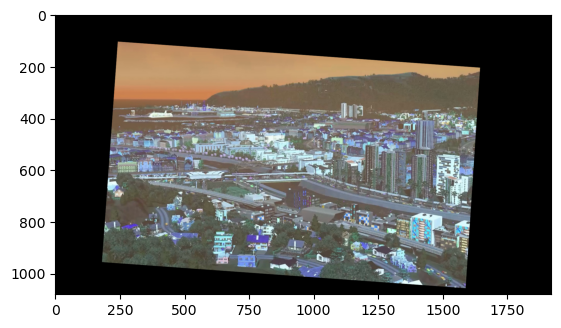

In [23]:
plt.imshow(aligned_frame)